In [ ]:
### 计算KS值
def KS(df, score, target):
    '''
    :param df: 包含目标变量与预测值的数据集,dataframe
    :param score: 得分或者概率,str
    :param target: 目标变量,str
    :return: KS值
    '''
    total = df.groupby([score])[target].count()
    bad = df.groupby([score])[target].sum()
    all = pd.DataFrame({'total':total, 'bad':bad})
    all['good'] = all['total'] - all['bad']
    all[score] = all.index
    all = all.sort_values(by=score,ascending=False)
    all.index = range(len(all))
    all['badCumRate'] = all['bad'].cumsum() / all['bad'].sum()
    all['goodCumRate'] = all['good'].cumsum() / all['good'].sum()
    KS = all.apply(lambda x: x.badCumRate - x.goodCumRate, axis=1)
    return max(KS)

Text(0.5, 1.0, 'Receiver Operating Characteristic')

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


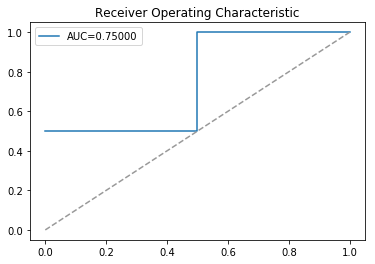

In [7]:
### sklearn计算auc：
# import numpy as np
# from sklearn.metrics import roc_curve

# y = np.array([1,1,2,2])   # 真实数据的标签
# pred = np.array([0.1,0.4,0.35,0.8])  # 预测其分类的概率值
# y
# pred
# fpr, tpr, thresholds = roc_curve(y, pred, pos_label=2)  # pos_label：设定为positive的label
# print(fpr)  # 假阳性率 = false positive rate = fpr = FP/(FP+TN)
# print(tpr)  # 真阳性率 = true positive rate = tpr = TP/(TP+FN)
# print(thresholds)  # thresholds：从大到小排序取值
# '''
# sklearn.metrics.roc_curve(y_true,y_score,pos_label=None, sample_weight=None, drop_intermediate=True)
# 样本：   1    1     2    2     THRESHOLDS    FPR       TPR   
# 概率值：0.1  0.4  0.35  0.8
# ACTUAL:  N    N     P    P
# PREDICT1:N    N     N    P        0.8       0/(0+2)   1/(1+1)
# PREDICT2:N    P     N    P        0.4       1/(1+1)   1/(1+1)
# PREDICT3:N    P     P    P       0.35       1/(1+1)   2/(2+0)
# PREDICT4:P    P     P    P        0.1       2/(2+0)   2/(2+0)
# '''


# from sklearn.metrics import auc
# print(auc(fpr, tpr))

# #绘制ROC曲线
%matplotlib inline
import matplotlib.pyplot as plt
auc_score=auc(fpr,tpr)
fig,ax=plt.subplots()
ax.plot(fpr,tpr,label='AUC=%.5f'%auc_score)
ax.set_title('Receiver Operating Characteristic')
ax.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
ax.legend()
fig.show()
